In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [37]:
lambda_1, lambda_2 = np.loadtxt('8_special_states_data_0_256_1000_1256_2000_2256_3000_3256_4000_4256.txt', dtype="complex",delimiter = '\t',unpack=True)

In [38]:
eigenvalue_1 = lambda_1.real
eigenvalue_2 = lambda_2.real

In [40]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

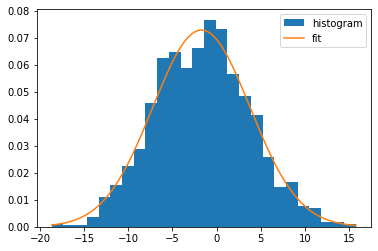

In [41]:
x = eigenvalue_1
bin_heights, bin_borders, _ = plt.hist(x, bins='auto',density = True, label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
plt.legend()
plt.show()

In [42]:
popt

array([-1.72688964,  0.07280105,  5.51627223])

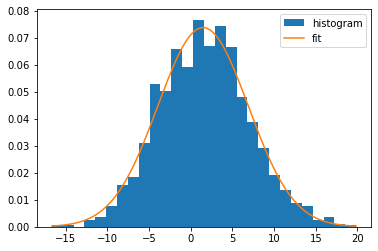

In [43]:
x = eigenvalue_2
bin_heights, bin_borders, _ = plt.hist(x, bins='auto',density = True, label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
plt.legend()
plt.show()

In [44]:
popt

array([1.47085244, 0.07372791, 5.42856801])

## Surmise of Wigner

In [76]:
def wigner(x, a,b):
    return a*x*np.exp(-b*x**2)

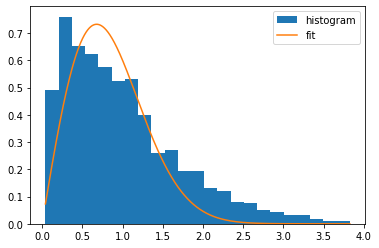

In [77]:
X = abs(eigenvalue_2-eigenvalue_1)
x = X/np.mean(X)
bin_heights, bin_borders, _ = plt.hist(x, bins='auto',density = True, label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(wigner, bin_centers, bin_heights, p0=[1., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, wigner(x_interval_for_fit, *popt), label='fit')
plt.legend()
plt.show()

In [78]:
popt

array([1.77963071, 1.08727586])